https://drive.google.com/drive/u/2/folders/10OKzKIEXnVvML807uGYcKjXONp-uC33k

In [6]:
from brian2 import *
%matplotlib inline

start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

G = NeuronGroup(1, eqs)
run(100*ms)

Input neuron spikes: [20 27]
Hidden neuron spikes: [6 6]
Output neuron spikes: [6]


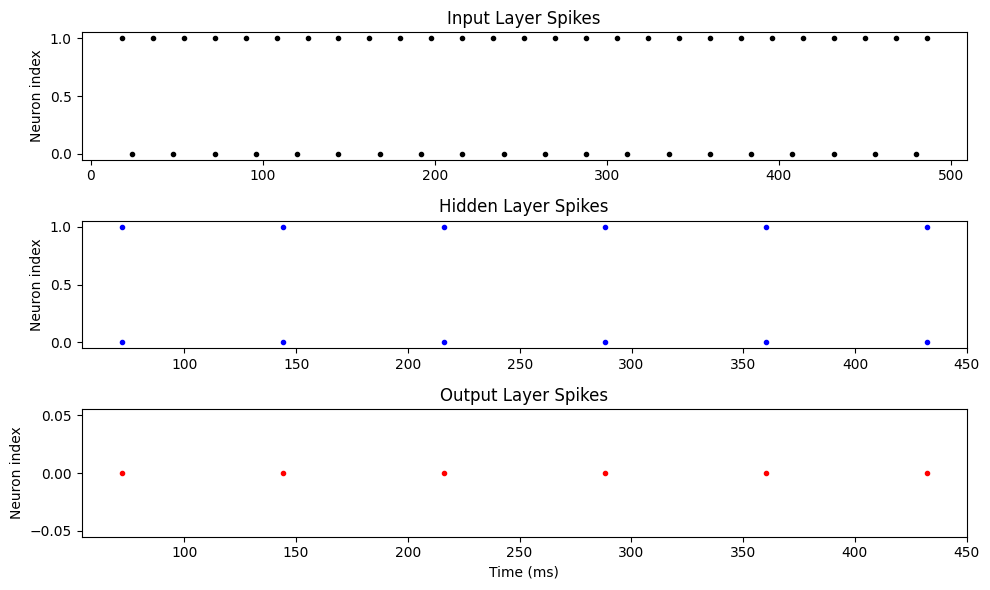

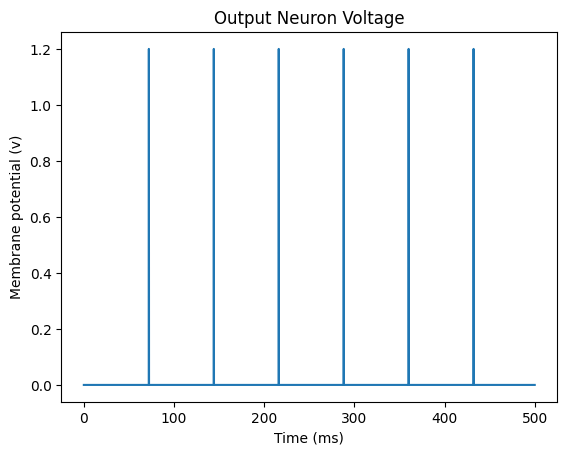

In [ ]:
# an actually complete example from GPT
from brian2 import *

# ----------------------------
# Setup simulation environment
# ----------------------------
start_scope()
defaultclock.dt = 0.1*ms  # simulation time resolution

# Optional: use numpy instead of compiling with Cython
prefs.codegen.target = "numpy"

# ----------------------------
# Neuron Model (LIF)
# ----------------------------
# Equation: simple LIF model with input current I
eqs = '''
dv/dt = (I - v) / (10*ms) : 1  # Membrane potential
I : 1                          # Input current (can vary per neuron)
'''

# ----------------------------
# Input Layer (2 neurons)
# ----------------------------
input_layer = NeuronGroup(2, eqs, threshold='v > 1', reset='v = 0', method='linear')
input_layer.I = [1.1, 1.2]  # Give both neurons enough current to spike

# ----------------------------
# Hidden Layer (2 neurons)
# ----------------------------
hidden_layer = NeuronGroup(2, eqs, threshold='v > 1', reset='v = 0', method='linear')
hidden_layer.I = 0  # Starts at zero — receives spikes from input layer

# ----------------------------
# Output Layer (1 neuron)
# ----------------------------
output_layer = NeuronGroup(1, eqs, threshold='v > 1', reset='v = 0', method='linear')
output_layer.I = 0  # Will be driven by spikes from hidden layer

# ----------------------------
# Synaptic Connections
# ----------------------------

# Input → Hidden
# Every input neuron connects to every hidden neuron
syn_input_hidden = Synapses(input_layer, hidden_layer, on_pre='v_post += 0.5')
syn_input_hidden.connect()  # fully connected (all-to-all)

# Hidden → Output
syn_hidden_output = Synapses(hidden_layer, output_layer, on_pre='v_post += 0.6')
syn_hidden_output.connect()  # again, fully connected

# ----------------------------
# Monitors to record activity
# ----------------------------
# Record spikes
spike_mon_input = SpikeMonitor(input_layer)
spike_mon_hidden = SpikeMonitor(hidden_layer)
spike_mon_output = SpikeMonitor(output_layer)

# Optionally record membrane voltage
v_mon_output = StateMonitor(output_layer, 'v', record=True)

# ----------------------------
# Run simulation
# ----------------------------
run(500*ms)

# ----------------------------
# Print results
# ----------------------------
print("Input neuron spikes:", spike_mon_input.count[:])
print("Hidden neuron spikes:", spike_mon_hidden.count[:])
print("Output neuron spikes:", spike_mon_output.count[:])

# ----------------------------
# Plotting
# ----------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Raster plot of spikes from each layer
plt.subplot(3, 1, 1)
plt.title("Input Layer Spikes")
plt.plot(spike_mon_input.t/ms, spike_mon_input.i, '.k')
plt.ylabel("Neuron index")

plt.subplot(3, 1, 2)
plt.title("Hidden Layer Spikes")
plt.plot(spike_mon_hidden.t/ms, spike_mon_hidden.i, '.b')
plt.ylabel("Neuron index")

plt.subplot(3, 1, 3)
plt.title("Output Layer Spikes")
plt.plot(spike_mon_output.t/ms, spike_mon_output.i, '.r')
plt.xlabel("Time (ms)")
plt.ylabel("Neuron index")

plt.tight_layout()
plt.show()

# Plot membrane potential of the output neuron
plt.figure()
plt.plot(v_mon_output.t/ms, v_mon_output.v[0])
plt.title("Output Neuron Voltage")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane potential (v)")
plt.show()
